## Linear Regression

In this jupyter script we will see how to perform one- and multidimensional regression tasks on a given dataset.
We will learn to use the python libraries **scipy.stats** as well as **statsmodels** to find regression parameters and their statistics. More information on the given libraries can be found in the following websites:

In [1]:
# Load all dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as sm
%matplotlib inline

First, we have to generate some sample data x and y to explore **stats.linregress** functionalities. It facilitates calculating a linear least-squares regression for two sets of measurements. **x** here is an evenly spaced values between 0 and 100, whereas **y** is a function of x and its intercept is normally distributed random numbers with the same size as x.

In [2]:
# set up some sample data
x = np.arange(100)
y = 0.5 * x + 2.0 + np.random.normal(0, 15, x.shape)

# linear regression fit
s, inter, r_value, p_value, std_err = stats.linregress(x, y)

print('slope:\t', round(s, 3))
print('inter:\t', round(inter, 3))
print('r2 val:\t', round(r_value**2, 3))
print('p  val:\t', p_value)
print('std:\t', round(std_err, 3))

slope:	 0.479
inter:	 2.459
r2 val:	 0.503
p  val:	 1.4933733331023614e-16
std:	 0.048


The return value of **stats.linregress**  acts like a namedtuple of length 5, with fields slope, intercept, rvalue, pvalue and stderr. Furthermore, we create scatter plot of x vs. y overlaid with extracted fitting line, and residuals plot (difference between fitted plot and original data),

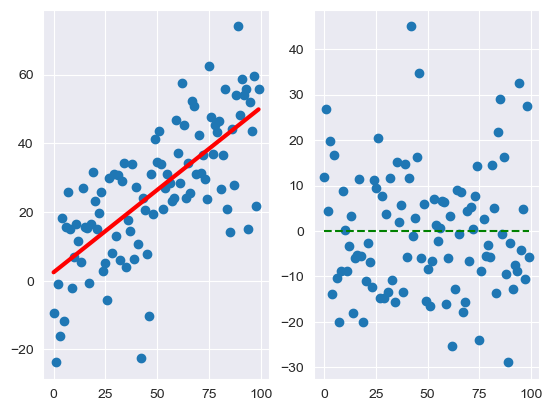

In [3]:
# plotting and comparison
line = s * x + inter
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax0.plot(x, line, lw=3, color='red')

# plot the residuals
ax1.scatter(x, line-y)
ax1.plot(x, np.zeros_like(x), 'g--')

Now we do the same operations but with **statsmodels** package. This will be done by creating a dataframe including x and y using **pandas**. Detailed output from **statsmodels.formula.api.ols** can be printed in the form of summary.

In [4]:
# set up some sample data
x = np.arange(100)
y = 0.5 * x + 2.0 + np.random.normal(0, 15, x.shape)
df = pd.DataFrame({'x': x, 'y': y})
# linear regression fit
reg = sm.ols(formula='y ~ x', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     89.47
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           1.81e-15
Time:                        10:24:19   Log-Likelihood:                -408.62
No. Observations:                 100   AIC:                             821.2
Df Residuals:                      98   BIC:                             826.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0554      2.888      1.404      0.1

Same plots are generated below using the results from **statsmodels.formula.api.ols**

slope:	 0.47665506310498806
inter:	 4.055432019653718
r2 val:	 0.4772558576160615


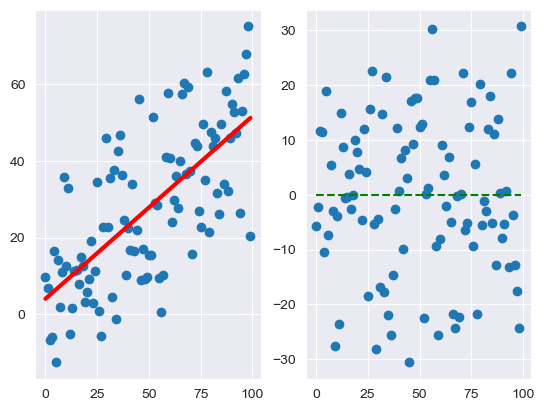

In [5]:
# read out the fitting parameters
inter, s = reg.params
line = s * x + inter
print('slope:\t', s)
print('inter:\t', inter)
print('r2 val:\t', reg.rsquared)

# plotting and comparison
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax0.plot(x, line, lw=3, color='red')

# plot the residuals
ax1.scatter(x, line-y)
ax1.plot(x, np.zeros_like(x), 'g--')

### Inverting the fitting procedure

The above algorithms fit the underlying data columns by means of the least-square method. What happens if instead of fitting  **y~x** we fit **x~y**?  Will it make the difference? We justify by giving numerical results (values of *s* and *inter*) and plots.

To start, we set up some sample data.

In [6]:
x = np.arange(200)
y = 1.5 * x + np.random.normal(0,20,np.shape(x))
df = pd.DataFrame({'x':x, 'y':y})

Next, we perform linear regression on your sample data by  fitting both y ~ x and x ~ y. Print respective slope,intercept and  fitting equations.

In [7]:
reg = sm.ols(formula='y ~ x', data=df).fit()
inter_yx, s_yx = reg.params
line_yx = s_yx * x + inter_yx
print('==fit y ~ x==')
print('slope:\t', np.round(s_yx,3))
print('inter:\t', np.round(inter_yx,3))
print('r2 val:\t', np.round(reg.rsquared,3))

==fit y ~ x==
slope:	 1.477
inter:	 1.698
r2 val:	 0.946


In [8]:
reg = sm.ols(formula='x ~ y', data=df).fit()
inter_xy, s_xy = reg.params
line_xy = s_xy * y + inter_xy
print('==fit x ~ y==')
print('slope:\t', np.round(s_xy,3))
print('inter:\t', np.round(inter_xy,3))
print('r2 val:\t', np.round(reg.rsquared,3))

==fit x ~ y==
slope:	 0.64
inter:	 4.312
r2 val:	 0.946


We visualize your data overlaid with fitted lines( both y ~ x and x ~ y) and their residual plots.

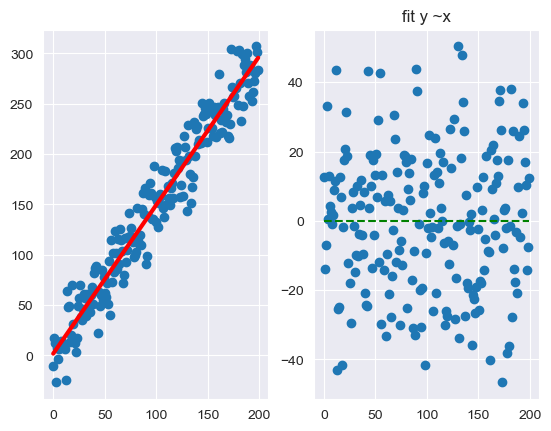

In [9]:
# plotting and comparison
f, (ax0, ax1) = plt.subplots(1, 2)
plt.title('fit y ~x')
ax0.scatter(x,y)
ax0.plot(x, line_yx, lw=3, color='red')

# plot the residuals
ax1.scatter(x, line_yx-y)
ax1.plot(x, np.zeros_like(x), 'g--')

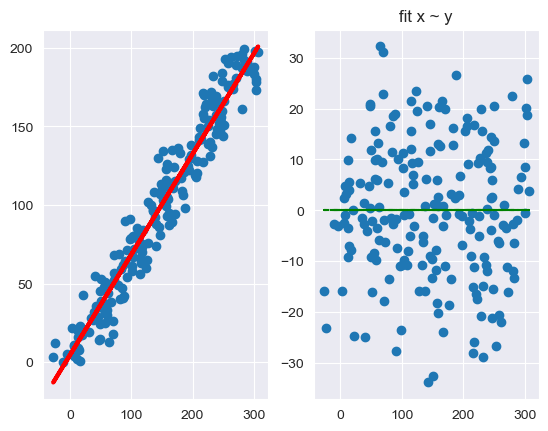

In [10]:
f, (ax0, ax1) = plt.subplots(1, 2)
plt.title('fit x ~ y')
ax0.scatter(y,x)
ax0.plot(y, line_xy, lw=3, color='red')

# plot the residuals
ax1.scatter(y, line_xy-x)
ax1.plot(y, np.zeros_like(y), 'g--')

### Data transformations
Nature likes power laws...

Often columns in the provided data are in fact correlated but the linear fitting requires to transform one or even both columns, e.g. through the **log-transformation**.

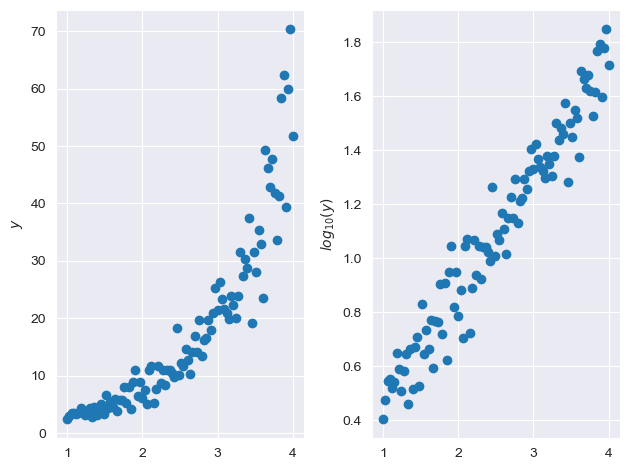

In [15]:
# an example case
x = np.linspace(1, 4, 100)
y = np.exp(x + np.random.normal(0, .2, x.shape))

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax0.set_ylabel("$y$")
ax1.scatter(x, np.log10(y))
ax1.set_ylabel("$log_{10}(y)$")
plt.tight_layout()

### Combining transformations and linear regression

We load the **bird_data_vincze_etal_2015.csv** dataset from the data folder as a pandas dataframe and examine the columns.

In [16]:
df_bird = pd.read_csv('data/bird_data_vincze_etal_2015.csv', sep = ',')
df_bird.head()

,Species,Migration distance,Body mass,Brain mass,Size of cerebellum,Size of telencephalon,Size of optic lobe,Wing aspect ratio,Wing area
0,Accipiter gentilis,542.0,1100.0,7.674,1.088,4.617,0.837,5.841,0.193
1,Accipiter nisus,2938.1,260.0,3.081,0.499,1.593,0.440,5.891,0.093
2,Acrocephalus scirpaceus,3577.0,14.0,0.483,0.066,0.282,0.070,4.835,0.008
3,Aegithalos caudatus,26.1,7.5,0.456,0.035,0.283,0.059,4.463,0.007
4,Aegypius monachus,972.2,9000.0,24.808,2.812,17.936,1.020,NaN,NaN


In [17]:
df_bird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                152 non-null    object 
 1   Migration distance     152 non-null    float64
 2   Body mass              152 non-null    float64
 3   Brain mass             152 non-null    float64
 4   Size of cerebellum     152 non-null    float64
 5   Size of telencephalon  152 non-null    float64
 6   Size of optic lobe     152 non-null    float64
 7   Wing aspect ratio      91 non-null     float64
 8   Wing area              91 non-null     float64
dtypes: float64(8), object(1)
memory usage: 10.8+ KB


In [18]:
df_bird.describe()

,Migration distance,Body mass,Brain mass,Size of cerebellum,Size of telencephalon,Size of optic lobe,Wing aspect ratio,Wing area
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,91.000000,91.000000
mean,2208.464474,1746.874342,5.336224,0.637612,3.618500,0.356868,5.981209,0.088297
std,2391.028832,8069.652638,6.632211,0.854241,4.716583,0.324252,1.180264,0.118651
min,0.000000,5.400000,0.357000,0.035000,0.219000,0.041000,4.332000,0.006000
25%,0.000000,55.425000,1.171500,0.148750,0.729000,0.120750,5.042000,0.015000
50%,1373.350000,255.000000,3.260000,0.373000,2.007000,0.257500,5.841000,0.044000
75%,3592.900000,1062.500000,6.291000,0.703250,4.382250,0.449000,6.606500,0.098500
max,8465.800000,90000.000000,41.058000,6.055000,27.072000,1.788000,9.610000,0.662000


Now, we perform linear regression on the column pairs such as  **Brain mass** vs. **Wing area** and display visually. We perform log-transform on the data before fitting, to account for skewedness in the data.

In [19]:
df_brainwing = pd.DataFrame({'x' : np.log10(df_bird['Brain mass']), 'y':np.log10(df_bird['Wing area'])})
reg = sm.ols(formula='y ~ x', data=df_brainwing).fit()
inter, s = reg.params
line =  s * df_brainwing['x'] + inter
#print(inter,s)

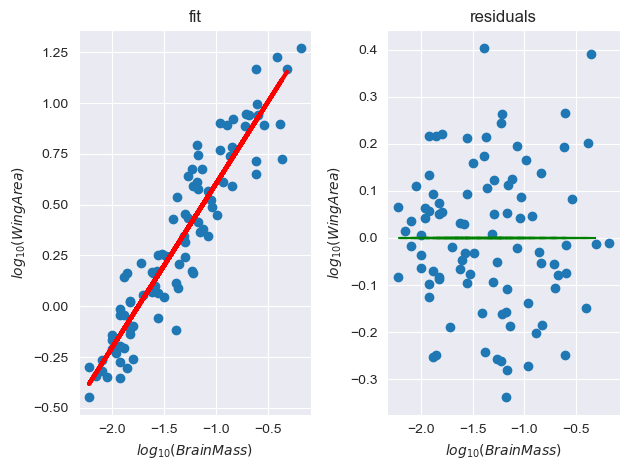

In [30]:
# plotting and comparison
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.set_title("fit")
ax0.set_xlabel("$log_{10}(Brain Mass)$")
ax0.set_ylabel("$log_{10}(Wing Area)$")
ax0.scatter(df_brainwing['x'],df_brainwing['y'])
ax0.plot(df_brainwing['x'], line, lw=3, color='red')

# plot the residuals
ax1.set_title("residuals")
ax1.set_xlabel("$log_{10}(Brain Mass)$")
ax1.set_ylabel("$log_{10}(Wing Area)$")
ax1.scatter(df_brainwing['x'], line-df_brainwing['y'])
ax1.plot(df_brainwing['x'], np.zeros_like(df_brainwing['x']), 'g--')

plt.tight_layout()

Then, we invert all fits as before ( **Wing area** vs. **Brain mass**) and provide corresponding plots.

In [31]:
df_brainwing = pd.DataFrame({'y' : np.log10(df_bird['Brain mass']), 'x':np.log10(df_bird['Wing area'])})
reg = sm.ols(formula='y ~ x', data=df_brainwing).fit()
inter, s = reg.params
line =  s * df_brainwing['x'] + inter

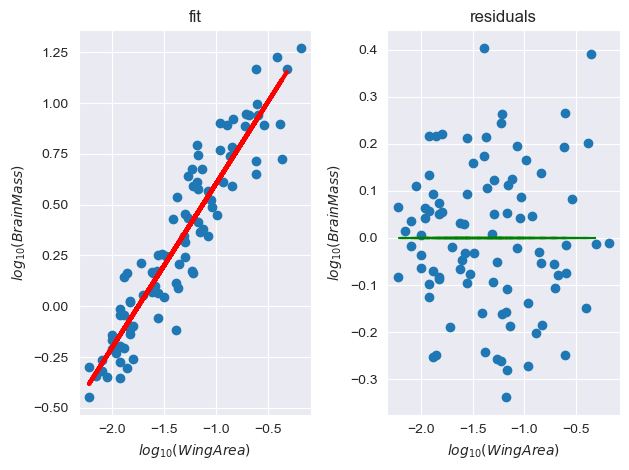

In [32]:
# plotting and comparison
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.set_title("fit")
ax0.set_ylabel("$log_{10}(Brain Mass)$")
ax0.set_xlabel("$log_{10}(Wing Area)$")
ax0.scatter(df_brainwing['x'],df_brainwing['y'])
ax0.plot(df_brainwing['x'], line, lw=3, color='red')

# plot the residuals
ax1.set_title("residuals")
ax1.set_ylabel("$log_{10}(Brain Mass)$")
ax1.set_xlabel("$log_{10}(Wing Area)$")
ax1.scatter(df_brainwing['x'], line-df_brainwing['y'])
ax1.plot(df_brainwing['x'], np.zeros_like(df_brainwing['x']), 'g--')

plt.tight_layout()

## Multiple linear regression
Let's now apply the same concepts to regress the best hyper-plane given three data columns.
The following example performs a 2-dimensional regression (using least-squares method) to fit
$$z=a_{0} + a_{1}x + a_{2}y$$

In [62]:
# we set up some sample data
x = np.random.uniform(-5, 5, 100)
y = np.random.uniform(-5, 5, 100)
z = 0.3*x + 0.2*y + np.random.normal(0, 0.25, x.shape)
# collect them in a pandas dataframe
df = pd.DataFrame({'x': x,
                   'y': y,
                   'z': z})

# linear regression fit
reg = sm.ols(formula='z ~ x + y', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     731.3
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           3.13e-59
Time:                        15:23:04   Log-Likelihood:               -0.56446
No. Observations:                 100   AIC:                             7.129
Df Residuals:                      97   BIC:                             14.94
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0139      0.025      0.559      0.5

Since we are dealing with 3D data, we need to import additionally **Axes3D** from **mpl_toolkits.mplot3d**. This allows us to create 3D plots.

The fitting formula is: z = 0.014 + 0.28 x + 0.204 y


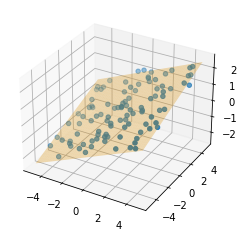

In [63]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
a0, a1, a2 = reg.params
print('The fitting formula is: z = {0:} + {1:} x + {2:} y'.format(round(a0, 3),round(a1, 3), round(a2, 3)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# set up the surface plot
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(X, Y) # creates coodrinate axes
ZZ = a0 + a1 * XX + a2 * YY
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='orange')

### Multiple linear regression from csv

We load the _multi\_regression.csv_ from the data folder and examine the dataset.

In [33]:
csv_mr = pd.read_csv('data/multi_regression.csv', sep= ',')
csv_mr.head()

,Unnamed: 0,x,y,z
0,0,79089.354518,-2.161552,8.754115
1,1,1217.243171,-0.852142,5.629499
2,2,41035.946100,-13.695592,11.071939
3,3,52.034894,1.087340,1.994319
4,4,5.122800,4.858077,0.055242


In [34]:
csv_mr.describe()

,Unnamed: 0,x,y,z
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,9311.595586,2.898996,3.817388
std,57.879185,18986.785645,10.408971,3.519971
min,0.000000,1.011426,-14.931685,-3.691530
25%,49.750000,16.796458,-5.071147,1.383447
50%,99.500000,674.460726,2.028308,3.919324
75%,149.250000,7752.665057,12.772004,6.360410
max,199.000000,86939.941558,19.913560,11.071939


Next we, make a scatter plot of __(x,y,z)__ after applying log-transform to x values.

(0.0, 10.0)

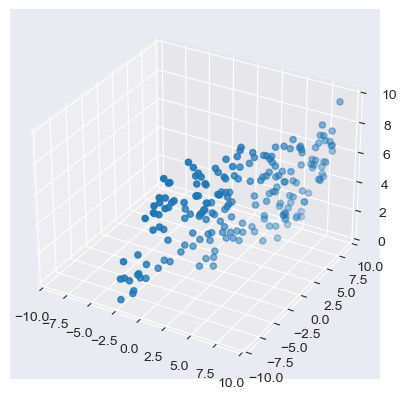

In [35]:
df_mr = pd.DataFrame({'x':np.log10(csv_mr['x']), 'y':csv_mr['y'], 'z':csv_mr['z']})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_mr['x'], df_mr['y'], df_mr['z'])
ax.set_xlim3d(-10,10)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(0,10)

Applying the techniques from above, fit the three data columns using multidimensional linear regression. Provide the scatter plot with fitted plane.

In [36]:
df_mr = pd.DataFrame({'x':np.log10(csv_mr['x']), 'y':csv_mr['y'], 'z':csv_mr['z']})
reg = sm.ols(formula='z ~ x + y', data=df_mr).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4567.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          9.28e-166
Time:                        10:37:36   Log-Likelihood:                -149.19
No. Observations:                 200   AIC:                             304.4
Df Residuals:                     197   BIC:                             314.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0025      0.075     -0.033      0.9

In [38]:
a0, a1, a2 = reg.params
print('The fitting formula is: z = {0:} + {1:} x + {2:} y'.format(round(a0, 3),round(a1, 3), round(a2, 3)))

The fitting formula is: z = -0.002 + 1.704 x + -0.2 y


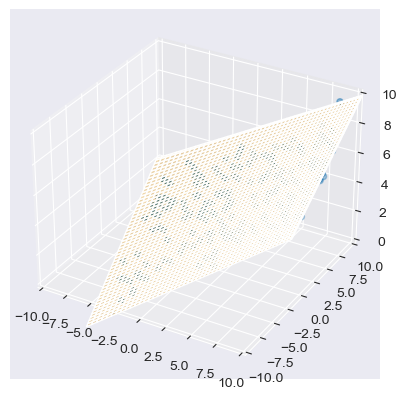

In [39]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_mr['x'], df_mr['y'], df_mr['z'])
ax.set_xlim3d(-10,10)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(0,10)
# construct the fitted plane
X = np.linspace(-1, 6, 100)
Y = np.linspace(-17, 20, 100)
XX, YY = np.meshgrid(X, Y) # creates coordinate axes
ZZ = a0 + a1 * XX + a2 * YY
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='orange')